<a href="https://colab.research.google.com/github/justbenjie/Students_EDA/blob/main/CT_school_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import pylab
from scipy import stats
import math
import random

# Загрузка данных

In [ ]:

df = pd.read_excel('/content/drive/MyDrive/Students_EDA/data/Готовые данные.xlsx', )

In [ ]:
df.head()

,university,stream,year,CT_total,CT_math,CT_native_language,CT_physics,CT_foreign_language,school_total,school_math,...,films_genre,musician,sport,sleep,bad_habit,vision_problem,temperament,career_family,politic_view,belief
0,бнту,поит исит 2 курс,2.0,256.0,90.0,83.0,83.0,NaN,28.0,9.0,...,фантастика,скорее да,скорее да,8,скорее нет,скорее да,скорее интроверт,скорее карьера,скорее правый,верующий
1,бгуир,NaN,2.0,236.0,73.0,81.0,82.0,NaN,26.0,10.0,...,фантастика,скорее да,скорее да,7,скорее нет,скорее нет,скорее экстраверт,скорее карьера,что это,верующий
2,бнту,поит исит 2 курс,2.0,265.0,88.0,89.0,88.0,NaN,30.0,10.0,...,"биография, драма, комедия",скорее нет,скорее да,7,скорее нет,скорее да,скорее экстраверт,скорее семья,что это,агностик
3,другие,NaN,1.0,216.0,65.0,79.0,NaN,72.0,27.0,9.0,...,"ужасы, психологические",скорее да,скорее нет,5,скорее да,скорее нет,скорее экстраверт,скорее карьера,что это,агностик
4,бнту,поит исит 2 курс,2.0,201.0,65.0,69.0,67.0,NaN,27.0,9.0,...,фантастика,скорее нет,скорее да,6,скорее да,скорее нет,скорее интроверт,скорее семья,скорее правый,агностик


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   university               170 non-null    object 
 1   stream                   38 non-null     object 
 2   year                     167 non-null    float64
 3   CT_total                 157 non-null    float64
 4   CT_math                  154 non-null    float64
 5   CT_native_language       160 non-null    float64
 6   CT_physics               136 non-null    float64
 7   CT_foreign_language      22 non-null     float64
 8   school_total             166 non-null    float64
 9   school_math              158 non-null    float64
 10  school_native_language   164 non-null    float64
 11  school_physics           142 non-null    float64
 12  school_foreign_language  19 non-null     float64
 13  university_math          157 non-null    float64
 14  gender                   1

In [ ]:
features = ['CT_math', 'school_math']

In [ ]:
target_df = df[features]

In [ ]:
target_df

,CT_math,school_math
0,90.0,9.0
1,73.0,10.0
2,88.0,10.0
3,65.0,9.0
4,65.0,9.0
...,...,...
165,83.0,8.0
166,80.0,8.0
167,90.0,9.0
168,88.0,10.0


# Визуализация данных, основные статистики







In [ ]:
def calc_draw_stat(data, title, xlabel):
  plt.figure(figsize=(10,3)).suptitle(title, size='x-large')
  sns.boxplot(x = data)
  plt.xlabel(xlabel)
  plt.show()
  
  statistics_scores = data.describe()
  statistics_scores.index = ['кол-во', 'среднее', 'станд. отклонение', 'мин', '25%', '50%', '75%', 'макс']
  statistics_scores = statistics_scores.apply(lambda x: round(x, 2))
  print(statistics_scores)


In [ ]:
def draw_hist(data, title, labels, bins, density=True):
  plt.figure(figsize=(8, 6)).suptitle(title, size='x-large')
  sns.histplot(x = data, bins=bins)
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.axvline(data.mean(), color='k', linestyle='dashed', linewidth=1)
  plt.show()
  
  print('Коэфицент ассиметрии:', data.skew())


## ЦТ по математике

In [ ]:
sns.set_theme(style="whitegrid")

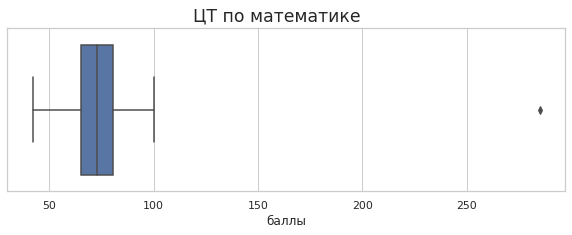

кол-во               154.00
среднее               73.75
станд. отклонение     20.38
мин                   42.00
25%                   65.00
50%                   73.00
75%                   80.75
макс                 285.00
Name: CT_math, dtype: float64


In [ ]:

calc_draw_stat(target_df['CT_math'], 'ЦТ по математике', 'баллы')

In [ ]:
target_df['CT_math'].loc[(target_df['CT_math']>100)|(target_df['CT_math']<20)] = np.NAN

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


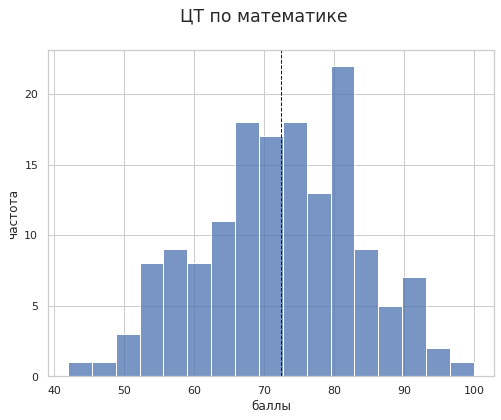

Коэфицент ассиметрии: -0.2056526437435418


In [ ]:
draw_hist(target_df['CT_math'], 'ЦТ по математике', ('баллы', 'частота'), 17)

## Математика в школе

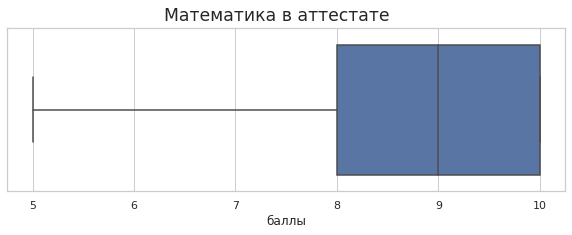

кол-во               158.00
среднее                8.88
станд. отклонение      1.10
мин                    5.00
25%                    8.00
50%                    9.00
75%                   10.00
макс                  10.00
Name: school_math, dtype: float64


In [ ]:
calc_draw_stat(target_df['school_math'], 'Математика в аттестате', 'баллы')

In [ ]:
target_df['school_math'].loc[(target_df['school_math']>10)|(target_df['school_math']<2)] = np.NAN

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


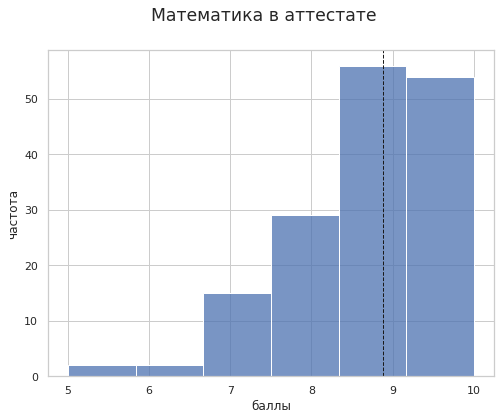

Коэфицент ассиметрии: -1.00185938842719


In [ ]:
draw_hist(target_df['school_math'], 'Математика в аттестате', ('баллы', 'частота'), 6)

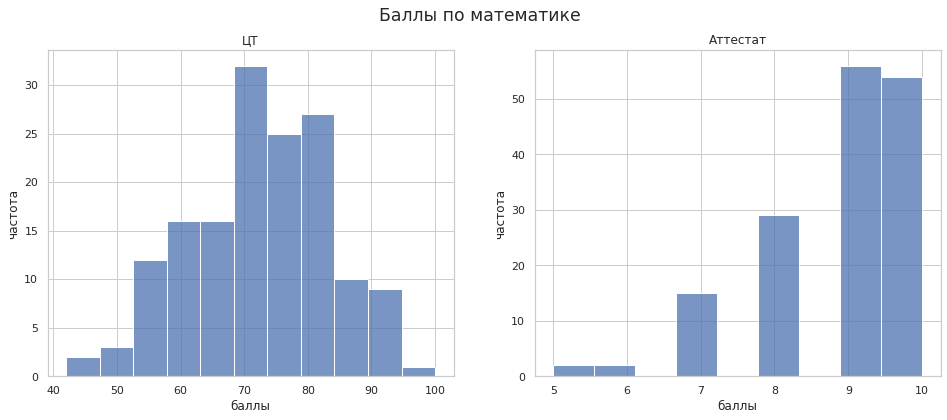

In [ ]:
plt.figure(figsize=(16,6)).suptitle('Баллы по математике', size='x-large')

plt.subplot(1, 2, 1, xlabel='баллы', ylabel='частота').set_title("ЦТ")
sns.histplot(data=target_df['CT_math'])

plt.subplot(1, 2, 2, xlabel='баллы', ylabel='частота').set_title("Аттестат")
sns.histplot(data=target_df['school_math'])
None

## Диаграмма рассеяния

In [ ]:
def jitter(limit):
    # Генератор джиттера (произвольного сдвига точек данных)'
    return lambda x: random.uniform(-limit, limit) + x

def scatter_plot(x, y, title, labels):
  plt.figure(figsize=(8, 6)).suptitle(title, size='x-large')
  sns.scatterplot(x = x, y = y)
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])

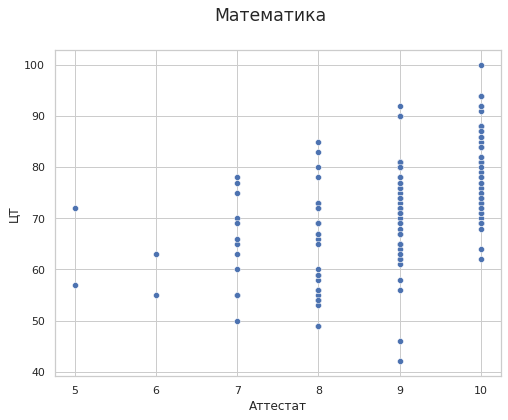

In [ ]:
scatter_plot(target_df['school_math'], target_df['CT_math'], 'Математика', ('Аттестат','ЦТ'))

# Корреляция Пирсона

In [ ]:
r = target_df['school_math'].corr(target_df['CT_math'])
print('r =', r)

r = 0.5102015125224368


## Выборочный r и популяционный p

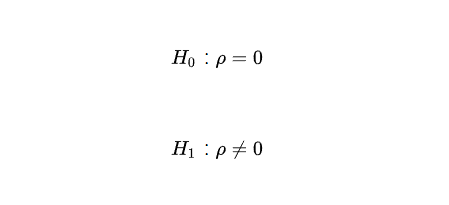

H0 - это гипотеза, что корреляция в популяции нулевая. Другими словами, наше консервативное представление состоит в том, что измеренная корреляция целиком вызвана случайной ошибкой при отборе.

H1 - это альтернативная возможность, что корреляция в популяции не нулевая. Отметим, что мы не определяем направление корреляции, а только что она существует. Это означает, что мы выполняем двустороннюю проверку.

Стандартная ошибка коэффициента корреляции r по выборке задается следующей формулой:

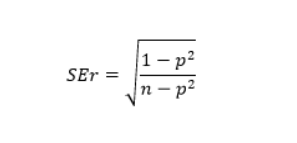

Расчитаем t-статистику:


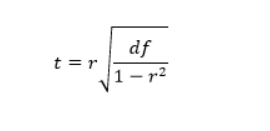

В приведенной формуле df — это степень свободы наших данных. Для проверки корреляции степень свободы равна n - 2, где n — это размер выборки. Подставив это значение в формулу, получим:

In [ ]:
target_df = target_df.loc[target_df.CT_math.notna() & target_df.school_math.notna()]
n = target_df.shape[0]
df = n - 2
df

148

In [ ]:
def calc_t_stat(r, df):
  return r * np.sqrt(df / (1 - r ** 2))

In [ ]:
t_stat = calc_t_stat(r, df)
t_stat

7.216829236061159

Итак, выборочное распределение этой статистики есть распределение Стьюдента с n-2 степенями свободы.

При заданном уровне значимости (α) определяем критическое значение tкр = t(0.025, 148) =  1,984

In [ ]:
t_crit = 1,984

|t| > tкр - отклоняем H0 и принимаем альтернативную гипотезу о существовании корреляции.



**Построение доверительного интервала для коэффициента корреляции**


Распределение выборочного коэффициента корреляции сложное, поэтому часто пользуются преобразованием Фишера для аппроксимации точного распределения коэффициента корреляции.



При больших значениях n распределение выборочного коэффициента корреляции r стремится к нормальному z.

Преобразование Фишера:

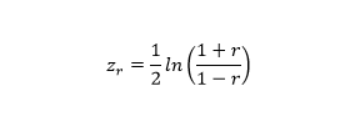

Для преобразованного z стандартная ошибка среднего равна:

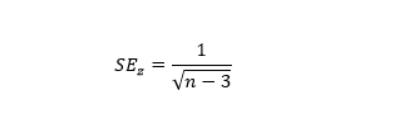

В целях вычисления интервала уверенности в терминах SEz, мы можем взять число стандартных отклонений от среднего, которое дает нам требуемый уровень доверия. Обычно используют число 1.96, так как оно является числом стандартных отклонений от среднего, которое содержит 95% площади под кривой. Другими словами, 1.96 стандартных ошибок от среднего значения выборочного r содержит истинную популяционную корреляцию ρ с 95%-ой определенностью.

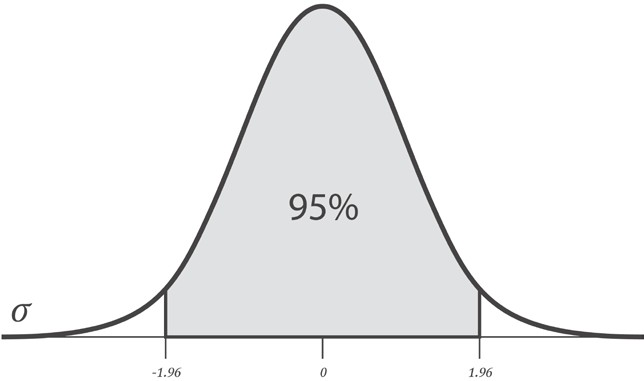

Однако, как показано на приведенном выше графике, мы хотели бы вычесть ту же самую величину, т.е. 2.5%, из каждого хвоста с тем, чтобы 95%-й доверительный интервал был центрирован на нуле. Для этого при выполнении двусторонней проверки нужно просто уменьшить разность наполовину и вычесть результат из 100%. Так что, требуемый уровень доверия в 95% означает, что мы обращаемся к критическому значению 97.5%:



# Поэтому наш 95%-й доверительный интервал в z-пространстве для ρ задается следующей формулой:

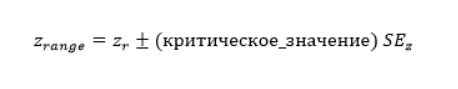

Подставив в нашу формулу zr и SEz, получим:



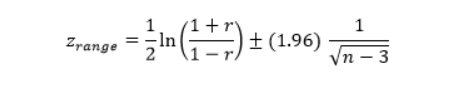

In [ ]:
def z_range(r, n):
  return 0.5 * np.log((1 + r) / (1 - r)) - 1 / np.sqrt(n - 3),  0.5 * np.log((1 + r) / (1 - r)) + 1 / np.sqrt(n - 3)

def calc_z_to_r(z):
  return (np.exp(z*2) - 1) / (np.exp(z*2) + 1)

In [ ]:
z1, z2 = z_range(r, n)
r1, r2 = calc_z_to_r(z1), calc_z_to_r(z2)

In [ ]:
print(f"Доверительный интервал в z: {z1, z2}")

Доверительный интервал в z: (0.4805235483329009, 0.6454807681013655)


В целях преобразования из z в r, мы используем следующее обратное уравнение z-преобразования:

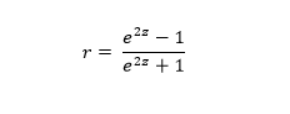

In [ ]:
print(f"Доверительный интервал в r: {r1, r2}")

Доверительный интервал в r: (0.44666280466845676, 0.5686197893780871)


В результате получаем 95%-й доверительный интервал для ρ, расположенный между 0.447 и 0.569. Мы можем быть уверены в том, что в более широкой популяции студентов существует положительная корреляция средней силы между отметкой по математике и ЦТ по этому предмету.

# Регрессия

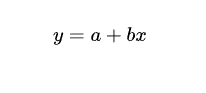

Найдём коэффицент b с помощью метода наименьших квадратов:

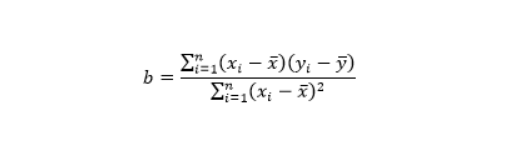

мы можем его упростить, приведя к следующему виду:



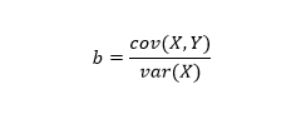

Смещение - это член, позволяющий прямой с заданным наклоном проходить через среднее значение X и Y:



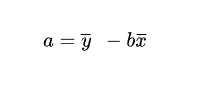

In [ ]:
def slope(x, y):
  return x.cov(y) / x.var()

def bias(x, y):
  return y.mean() - (x.mean() * slope(x, y))

In [ ]:
a = bias(target_df['school_math'], target_df['CT_math'])
b = slope(target_df['school_math'], target_df['CT_math'])
print(a, b)

26.019739827560137 5.215171683557707


In [ ]:
def regression_line(a, b):
  return lambda x: a + (b * x)

In [ ]:
def draw_regression_line(x, y, title, labels):
  scatter_plot(x, y, title, labels)
  a, b = bias(x, y), slope(x, y)
  s = pd.Series(range(4,11))
  #plt.plot(s, s.map(regression_line(a, b)))


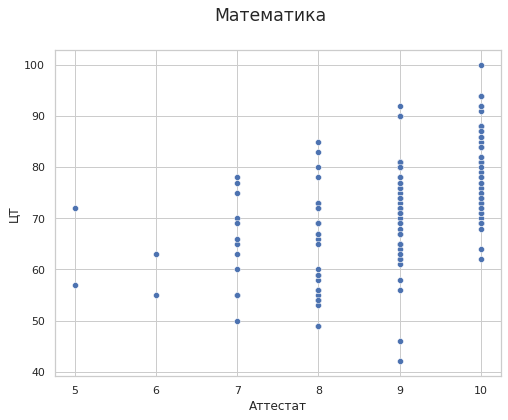

In [ ]:
draw_regression_line(target_df['school_math'], target_df['CT_math'], 'Математика', ('Аттестат', 'ЦТ'))

**Качество регрессии**

In [ ]:
x = target_df['school_math']
target_df['CT_math_pred'] = x.map(regression_line(a, b))
target_df['CT_math_pred'] = target_df['CT_math_pred'].apply(lambda x: int(x + 0.5))
target_df['CT_math_pred']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      73
1      78
2      78
3      73
4      73
       ..
165    68
166    68
167    73
168    78
169    78
Name: CT_math_pred, Length: 150, dtype: int64

In [ ]:
def regression_error(x, y, y_pred, title, labels):
  y = y - y_pred
  scatter_plot(x, y, title, labels)

  s = pd.Series(range(4,11))
  plt.plot(s, s.apply(lambda x: 0))
  plt.show()

  print(y.describe())

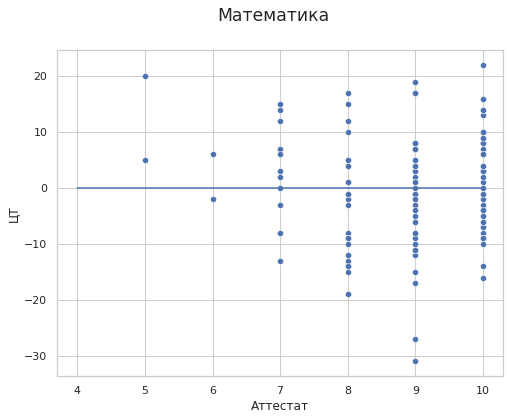

count    150.000000
mean      -0.040000
std        9.584579
min      -31.000000
25%       -8.000000
50%        0.500000
75%        7.000000
max       22.000000
dtype: float64


In [ ]:
regression_error(target_df['school_math'], target_df['CT_math'], target_df['CT_math_pred'], 'Математика', ('Аттестат', 'ЦТ'))